In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [4]:
X=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
X.shape

(1067, 6)

In [5]:
X=np.array(X)

In [6]:
X

array([[ 2. ,  4. ,  9.9,  6.7,  8.5, 33. ],
       [ 2.4,  4. , 11.2,  7.7,  9.6, 29. ],
       [ 1.5,  4. ,  6. ,  5.8,  5.9, 48. ],
       ...,
       [ 3. ,  6. , 13.4,  9.8, 11.8, 24. ],
       [ 3.2,  6. , 12.9,  9.3, 11.3, 25. ],
       [ 3.2,  6. , 14.9, 10.2, 12.8, 22. ]])

In [7]:
Y=df[['CO2EMISSIONS']]
Y.shape

(1067, 1)

In [8]:
Y=np.array(Y)
Y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]])

In [9]:
print(X)


[[ 2.   4.   9.9  6.7  8.5 33. ]
 [ 2.4  4.  11.2  7.7  9.6 29. ]
 [ 1.5  4.   6.   5.8  5.9 48. ]
 ...
 [ 3.   6.  13.4  9.8 11.8 24. ]
 [ 3.2  6.  12.9  9.3 11.3 25. ]
 [ 3.2  6.  14.9 10.2 12.8 22. ]]


In [10]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
print(X)
#onehotencoder = OneHotEncoder(categories= 'auto' )
#onehotencoder = OneHotEncoder(categorical_features = [3])
#X = onehotencoder.fit_transform(X).toarray()

ct = ColumnTransformer([("Location", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

print(X)

[[ 2.   4.   9.9 16.   8.5 33. ]
 [ 2.4  4.  11.2 26.   9.6 29. ]
 [ 1.5  4.   6.   7.   5.9 48. ]
 ...
 [ 3.   6.  13.4 47.  11.8 24. ]
 [ 3.2  6.  12.9 42.  11.3 25. ]
 [ 3.2  6.  14.9 51.  12.8 22. ]]
  (0, 16)	1.0
  (0, 118)	2.0
  (0, 119)	4.0
  (0, 120)	9.9
  (0, 121)	8.5
  (0, 122)	33.0
  (1, 26)	1.0
  (1, 118)	2.4
  (1, 119)	4.0
  (1, 120)	11.2
  (1, 121)	9.6
  (1, 122)	29.0
  (2, 7)	1.0
  (2, 118)	1.5
  (2, 119)	4.0
  (2, 120)	6.0
  (2, 121)	5.9
  (2, 122)	48.0
  (3, 40)	1.0
  (3, 118)	3.5
  (3, 119)	6.0
  (3, 120)	12.7
  (3, 121)	11.1
  (3, 122)	25.0
  (4, 36)	1.0
  :	:
  (1062, 122)	24.0
  (1063, 44)	1.0
  (1063, 118)	3.2
  (1063, 119)	6.0
  (1063, 120)	13.2
  (1063, 121)	11.5
  (1063, 122)	25.0
  (1064, 47)	1.0
  (1064, 118)	3.0
  (1064, 119)	6.0
  (1064, 120)	13.4
  (1064, 121)	11.8
  (1064, 122)	24.0
  (1065, 42)	1.0
  (1065, 118)	3.2
  (1065, 119)	6.0
  (1065, 120)	12.9
  (1065, 121)	11.3
  (1065, 122)	25.0
  (1066, 51)	1.0
  (1066, 118)	3.2
  (1066, 119)	6.0
  (1066, 120

In [11]:
# Avoiding the Dummy Variable Trap
#X = X[:, 1:]
#print(X)
#splitting the dataset as training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=0)


# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
#Actual Value 
print(Y_test)
#Prediced Value
print(y_pred)


[[356]
 [209]
 [230]
 [212]
 [168]
 [292]
 [212]
 [276]
 [202]
 [334]
 [313]
 [437]
 [224]
 [281]
 [177]
 [260]
 [414]
 [223]
 [251]
 [359]
 [191]
 [189]
 [244]
 [242]
 [131]
 [283]
 [274]
 [294]
 [246]
 [110]
 [359]
 [239]
 [229]
 [237]
 [191]
 [196]
 [294]
 [221]
 [237]
 [237]
 [184]
 [184]
 [202]
 [194]
 [297]
 [198]
 [260]
 [179]
 [344]
 [359]
 [338]
 [288]
 [290]
 [129]
 [230]
 [179]
 [283]
 [159]
 [258]
 [209]
 [207]
 [205]
 [225]
 [294]
 [262]
 [299]
 [354]
 [230]
 [207]
 [124]
 [304]
 [189]
 [354]
 [270]
 [338]
 [216]
 [283]
 [179]
 [235]
 [166]
 [186]
 [253]
 [161]
 [334]
 [407]
 [246]
 [191]
 [172]
 [290]
 [258]
 [262]
 [209]
 [283]
 [342]
 [356]
 [368]
 [168]
 [221]
 [368]
 [262]
 [182]
 [320]
 [126]
 [166]
 [202]
 [196]
 [200]
 [288]
 [191]
 [259]
 [214]
 [228]
 [269]
 [317]
 [327]
 [294]
 [292]
 [244]
 [361]
 [200]
 [258]
 [191]
 [382]
 [147]
 [179]
 [310]
 [229]
 [237]
 [292]
 [264]
 [230]
 [294]
 [184]
 [136]
 [344]
 [373]
 [283]
 [110]
 [198]
 [232]
 [262]
 [191]
 [342]

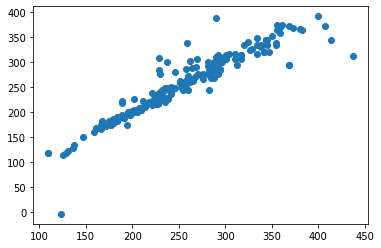

In [12]:
plt.scatter(Y_test,y_pred)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)
X_transform

array([[-0.9512918 , -0.99896853, -0.82855772, -0.99334135, -0.88430407,
         0.87855306],
       [-0.66865251, -0.99896853, -0.5114328 , -0.63532912, -0.5685715 ,
         0.34273362],
       [-1.30459092, -0.99896853, -1.77993246, -1.31555236, -1.63058106,
         2.88787597],
       ...,
       [-0.24469358,  0.11424235,  0.02524013,  0.11649658,  0.06289365,
        -0.32704069],
       [-0.10337393,  0.11424235, -0.09673099, -0.06250954, -0.08062116,
        -0.19308583],
       [-0.10337393,  0.11424235,  0.3911535 ,  0.25970147,  0.34992326,
        -0.59495041]])

In [10]:
import matplotlib.pyplot as plt

In [11]:
# x and y mean
mean_x=np.mean(X_transform)
mean_y=np.mean(Y)

In [13]:
numer=0
denom=0
x=X_transform
for i in range(len(Y)):
#     numerator of M 'slpoe'
    numer+=(x[i]-mean_x)*(Y[i]-mean_y)
#     denumerator of M 'slpoe'
    denom+=(x[i]-mean_x)**2
m=numer/denom
c=mean_y-(m*mean_x)
print(m,c)

[ 55.37121136  53.82123208  56.88409514  54.58535623  56.50974552
 -57.41336802] [256.22867854 256.22867854 256.22867854 256.22867854 256.22867854
 256.22867854]


In [15]:
# Goodness of fit R-Square
ss_t=0
ss_r=0
for i in range(len(Y)):
    y_p=c+m*x[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_p)**2
r2=1-(ss_r/ss_t)
print(r2)

[0.76414586 0.72196391 0.80647317 0.74260952 0.79589343 0.8215505 ]


ValueError: x and y must be the same size

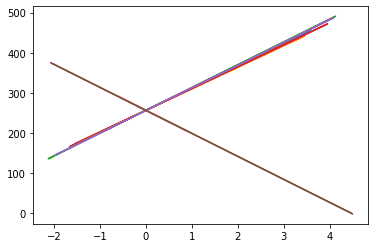

In [16]:
plt.figure
plt.plot(x,m*x+c)
plt.scatter(x,Y,label="graph")
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression as LR
reg = LR().fit(X,Y)
p=reg.coef_[0][0]
q=reg.intercept_[0]
print(p,q)
print(reg.score(X,Y))

8.577672617039145 253.53120114591746
0.8892861092642407


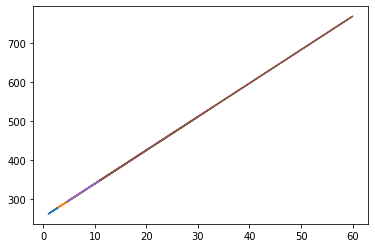

In [19]:
plt.figure
plt.plot(X,p*X+q)
# plt.scatter(X,Y,label="graph")
plt.show()

# GD for linear regression


In [97]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s
   

   
        
        
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept
    

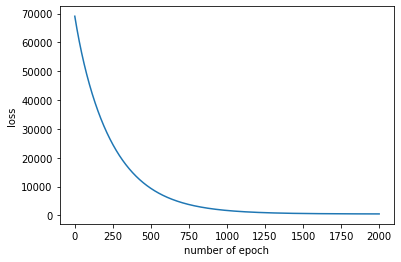

In [98]:
w,b=gradient_descent(X_transform,Y)

In [99]:
print("weight:",w)
print("bias:",b)


weight: [ 13.53498112  11.62900377   7.29244974   7.48746661   7.93663515
 -15.42239212]
bias: [251.55444603]


# Predict

In [100]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [101]:
y_pred=predict(X_transform)
y_pred

array([[193.01410643],
       [212.60231783],
       [141.97031891],
       ...,
       [256.17028816],
       [252.64834725],
       [268.23355164]])

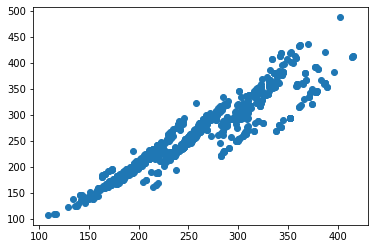

In [102]:
plt.scatter(y_pred,Y)

In [103]:
mean_y=np.mean(Y)

In [104]:
# Goodness of fit R-Square
ss_t=0
ss_r=0
for i in range(len(Y)):
    y_p=y_pred[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_p)**2
r2=1-(ss_r/ss_t)
print(r2)

[0.87794971]
